<a href="https://colab.research.google.com/github/EdivaldoVictor/Projeto-Big-Data-Python/blob/main/Eleitorado2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Eleitorado Eleições 2010**

**Importando as Bibliotecas Necessárias para o Projeto**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Criando nosso DataFrame a partir da planilha**

In [2]:
df = pd.read_csv('drive/MyDrive/PlanilhaEleições/perfil_eleitorado_2010.csv', encoding='latin1', sep=';')

**Analisando se há colunas sem valores "Nulas"**

In [3]:
df.info
df.isnull().sum()

,0
DT_GERACAO,0
HH_GERACAO,0
ANO_ELEICAO,0
SG_UF,0
CD_MUNICIPIO,0
NM_MUNICIPIO,0
CD_MUN_SIT_BIOMETRICA,0
DS_MUN_SIT_BIOMETRICA,0
NR_ZONA,0
CD_GENERO,0


In [4]:
eleitores = list(df.QT_ELEITORES_PERFIL.unique())

#**Juntando Cidades e Estados**

In [5]:
def mescla_cidade_e_estado(n):
    return n.NM_MUNICIPIO + "-" + n.SG_UF

df.NM_MUNICIPIO = df.apply(mescla_cidade_e_estado, axis=1)

In [6]:
len(df.NM_MUNICIPIO.unique())

5722

#**Eleitores por estado**

In [7]:
eleitores_por_estado = df.groupby('SG_UF')['QT_ELEITORES_PERFIL'].sum()

eleitores_por_estado = eleitores_por_estado.sort_values(ascending=False)

**Tabela**

In [8]:
eleitores_por_estado_df = pd.DataFrame({'UF': eleitores_por_estado.index, 'Eleitores': eleitores_por_estado.values})
eleitores_por_estado_df

,UF,Eleitores
0,SP,30301398
1,MG,14522090
2,RJ,11589763
3,BA,9550898
4,RS,8112236
5,PR,7601553
6,PE,6259850
7,CE,5881584
8,PA,4768457
9,SC,4538981


#**Total de Eleitores Aptos**

In [9]:
total_eleitores_df = pd.DataFrame({'Total de Eleitores Aptos': [eleitores_por_estado.sum()]})

**Tabela**

In [10]:
total_eleitores_df

,Total de Eleitores Aptos
0,135804433


**Gráfico**

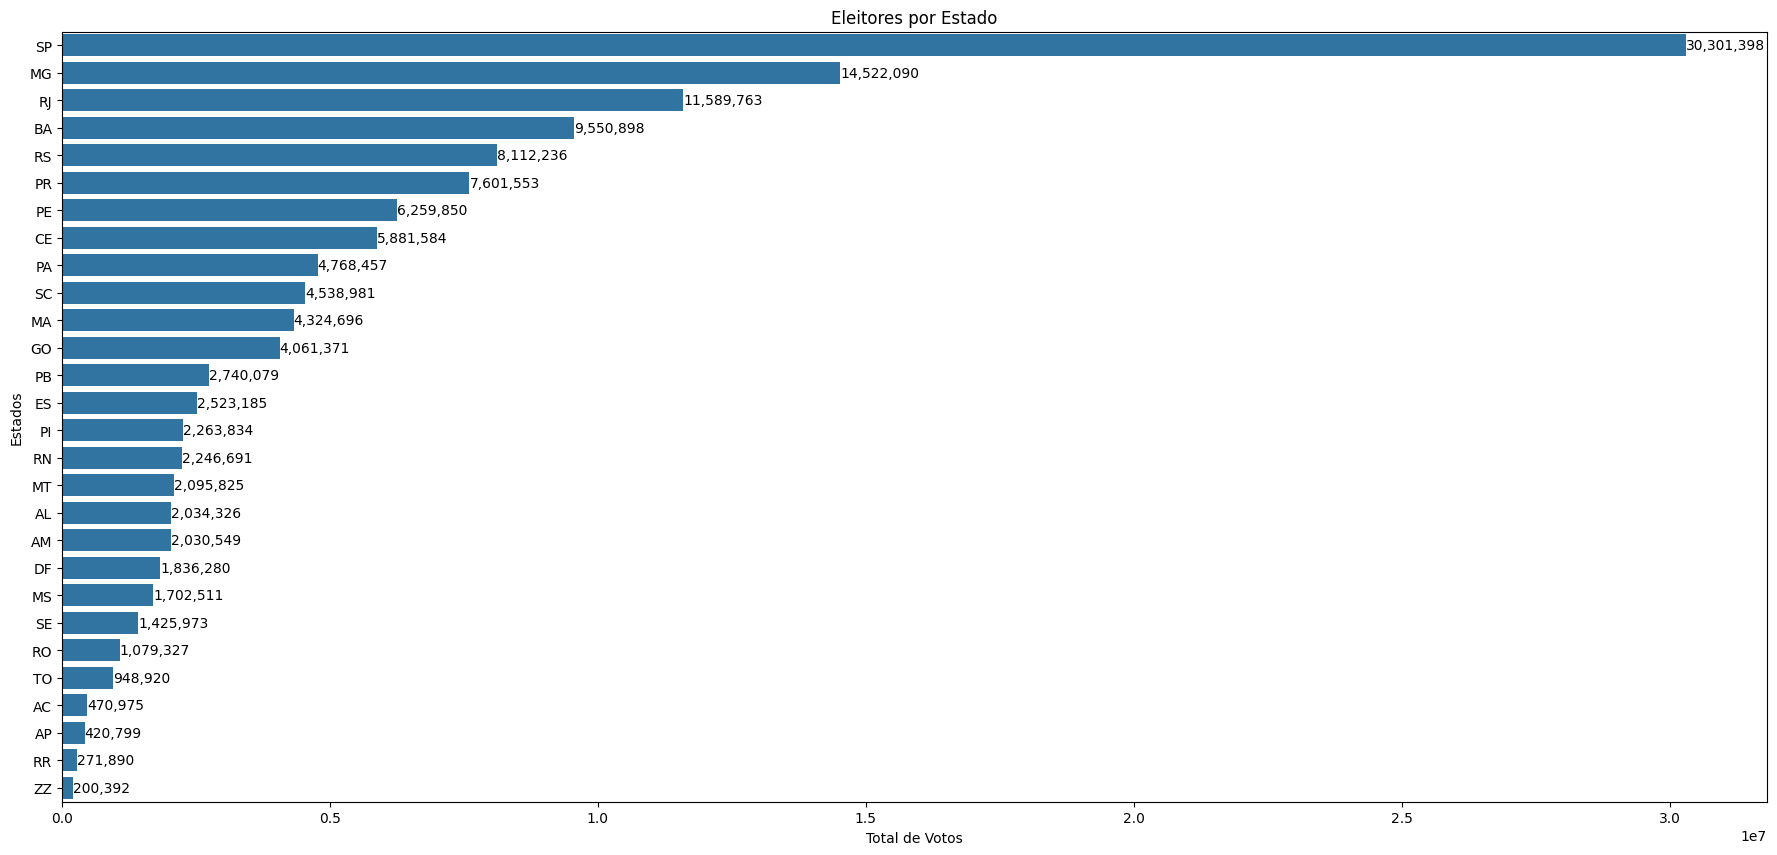

In [11]:

plt.figure(figsize=(22, 10))
sns.barplot(x=eleitores_por_estado.values, y=eleitores_por_estado.index, orient='h')
plt.xlabel('Total de Votos')
plt.ylabel('Estados')
plt.title('Eleitores por Estado')


for i, v in enumerate(eleitores_por_estado.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Eleitores Com Biometria(sem dados)**

In [37]:
eleitores_biometria_por_estado = df.groupby('SG_UF')['QT_ELEITORES_BIOMETRIA'].sum()
eleitores_biometria_por_estado = eleitores_biometria_por_estado.sort_values(ascending=False)
eleitores_biometria_df = pd.DataFrame({
    'UF': eleitores_biometria_por_estado.index,
    'Eleitores com Biometria': eleitores_biometria_por_estado.values
})


**Tabela**

In [39]:
eleitores_biometria_df

,UF,Eleitores com Biometria
0,AC,0
1,AL,0
2,TO,0
3,SP,0
4,SE,0
5,SC,0
6,RS,0
7,RR,0
8,RO,0
9,RN,0


#**Eleitores Com Deficiência**

In [21]:
eleitores_deficiencia_por_estado = df.groupby('SG_UF')['QT_ELEITORES_DEFICIENCIA'].sum()
eleitores_deficiencia_por_estado = eleitores_deficiencia_por_estado.sort_values(ascending=False)
eleitores_deficiencia_df = pd.DataFrame({
    'UF': eleitores_deficiencia_por_estado.index,
    'QT_ELEITORES_DEFICIENCIA': eleitores_deficiencia_por_estado.values
})



**Tabela**

In [22]:
eleitores_deficiencia_df

,UF,QT_ELEITORES_DEFICIENCIA
0,SP,59448
1,RJ,19677
2,MG,10028
3,RS,8113
4,BA,7102
5,PR,4790
6,PA,4199
7,SC,2847
8,ES,2468
9,PE,2442


**Total de Eleitores Com Deficiência**

In [23]:
total_eleitores_deficiencia_df = pd.DataFrame({
    'Total de Eleitores com Deficiência': [eleitores_deficiencia_por_estado.sum()]
})
total_eleitores_deficiencia_df

,Total de Eleitores com Deficiência
0,141698


**Gráfico**

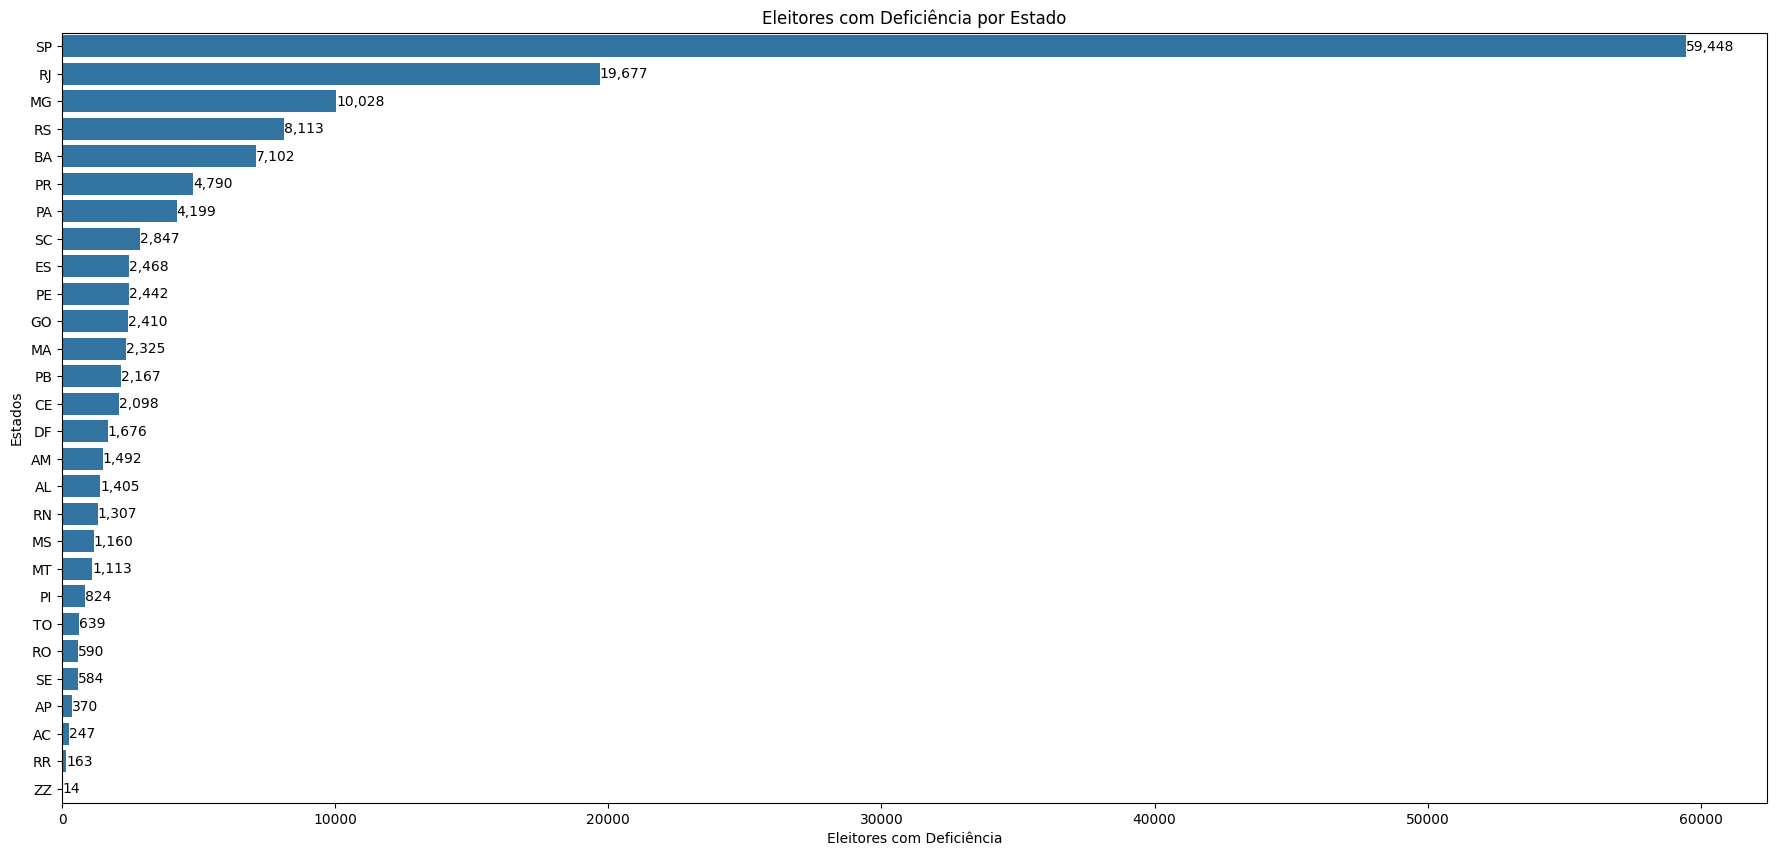

In [24]:
plt.figure(figsize=(22, 10))
sns.barplot(x='QT_ELEITORES_DEFICIENCIA', y='UF', data=eleitores_deficiencia_df, orient='h')
plt.xlabel('Eleitores com Deficiência')
plt.ylabel('Estados')
plt.title('Eleitores com Deficiência por Estado')

for i, v in enumerate(eleitores_deficiencia_df['QT_ELEITORES_DEFICIENCIA']):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Gênero dos Eleitores**

In [25]:
genero_eleitores_por_estado = df.groupby(['SG_UF', 'DS_GENERO'])['QT_ELEITORES_PERFIL'].sum().unstack()
genero_eleitores_por_estado = genero_eleitores_por_estado.fillna(0)
genero_eleitores_por_estado['Total'] = genero_eleitores_por_estado.sum(axis=1)
for genero in ['FEMININO', 'MASCULINO']:
    genero_eleitores_por_estado[genero + ' (%)'] = (genero_eleitores_por_estado[genero] / genero_eleitores_por_estado['Total']) * 100

genero_eleitores_por_estado = genero_eleitores_por_estado.round(1)


**Tabela**

In [26]:
genero_eleitores_por_estado

DS_GENERO,FEMININO,MASCULINO,NÃO INFORMADO,Total,FEMININO (%),MASCULINO (%)
SG_UF,,,,,,
AC,236408.0,234545.0,22.0,470975.0,50.2,49.8
AL,1070577.0,962706.0,1043.0,2034326.0,52.6,47.3
AM,1024553.0,1005651.0,345.0,2030549.0,50.5,49.5
AP,212116.0,208572.0,111.0,420799.0,50.4,49.6
BA,4957613.0,4585099.0,8186.0,9550898.0,51.9,48.0
CE,3078261.0,2794621.0,8702.0,5881584.0,52.3,47.5
DF,984698.0,850953.0,629.0,1836280.0,53.6,46.3
ES,1296394.0,1224272.0,2519.0,2523185.0,51.4,48.5
GO,2084649.0,1976129.0,593.0,4061371.0,51.3,48.7


**Gráfico**

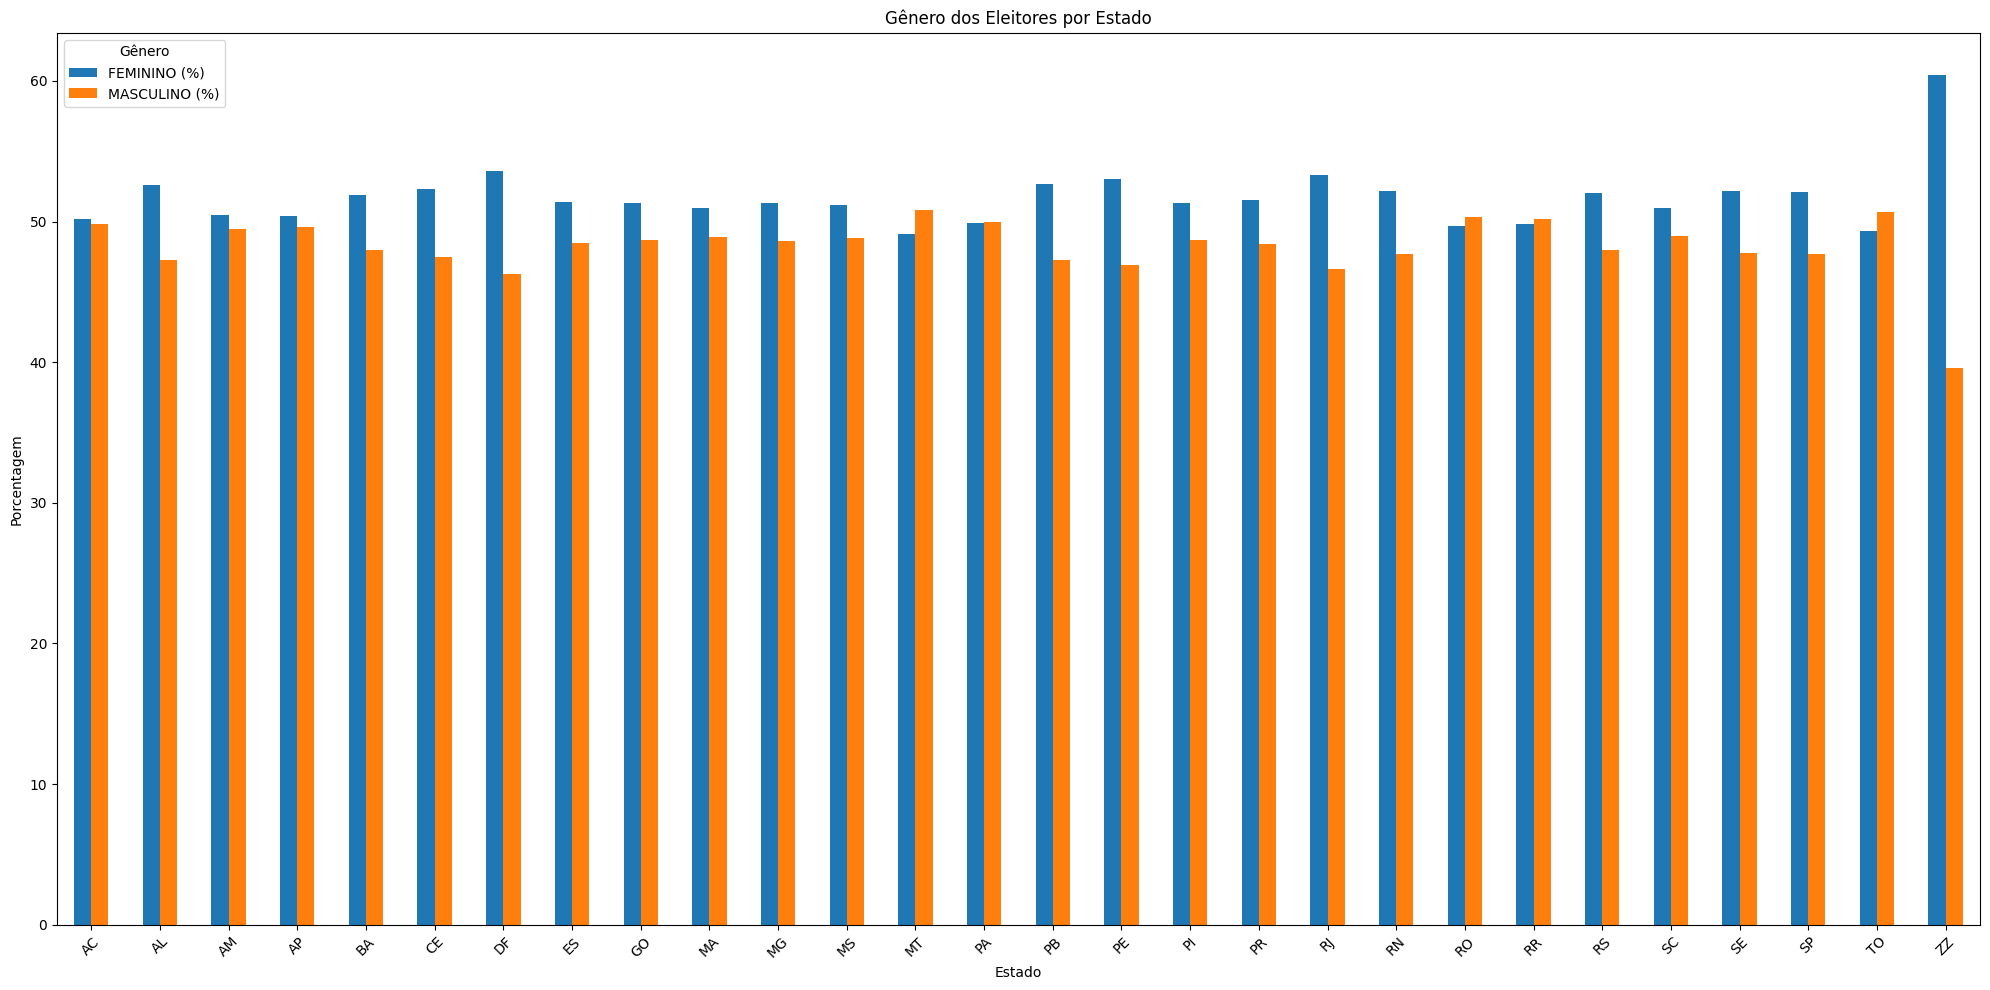

In [27]:

percentagem_colunas = [col for col in genero_eleitores_por_estado.columns if '%' in col]
plot_data = genero_eleitores_por_estado[percentagem_colunas].sort_index()

plot_data.plot(kind='bar', figsize=(20, 10))
plt.xlabel("Estado")
plt.ylabel("Porcentagem")
plt.title("Gênero dos Eleitores por Estado")
plt.xticks(rotation=45)
plt.legend(title="Gênero")

plt.tight_layout()
plt.show()

**Tabela Total gênero**

In [28]:
contagem_genero = df[df['DS_GENERO'] != 'Não Informado'].groupby('DS_GENERO')['QT_ELEITORES_PERFIL'].sum()
Total_de_EleitoresGen = contagem_genero.sum()
Porcentagem_Genero = (contagem_genero / Total_de_EleitoresGen) * 100
Tabela_Genero = pd.DataFrame({'Total': contagem_genero, 'Percentagem': Porcentagem_Genero.round(2)})

In [29]:
Tabela_Genero

,Total,Percentagem
DS_GENERO,,
FEMININO,70373971,51.82
MASCULINO,65282009,48.07
NÃO INFORMADO,148453,0.11


**Gráfico**

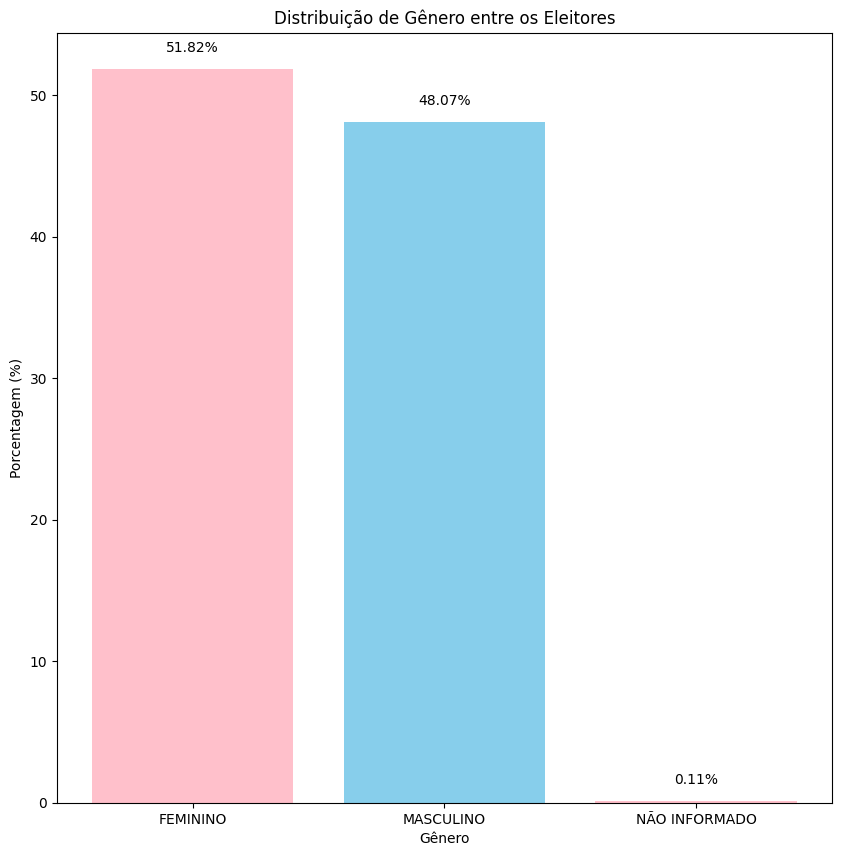

In [30]:
plt.figure(figsize=(10, 10))
plt.bar(Tabela_Genero.index, Tabela_Genero['Percentagem'], color=['pink', 'skyblue'])
plt.xlabel("Gênero")
plt.ylabel("Porcentagem (%)")
plt.title("Distribuição de Gênero entre os Eleitores")

for i, v in enumerate(Tabela_Genero['Percentagem']):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

#**Faixa Etária do Eleitores**

In [31]:
faixa_etaria_eleitores = df.groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()

faixa_etaria_eleitores = faixa_etaria_eleitores.sort_values(ascending=False)

faixa_etaria_df = pd.DataFrame({'Faixa Etária': faixa_etaria_eleitores.index,
                               'Total de Eleitores': faixa_etaria_eleitores.values})

**Tabela**

In [32]:
faixa_etaria_df

,Faixa Etária,Total de Eleitores
0,25 a 29 anos,17090076
1,30 a 34 anos,15699306
2,35 a 39 anos,13792746
3,21 a 24 anos,13491493
4,40 a 44 anos,12967989
5,45 a 49 anos,12051070
6,50 a 54 anos,10297277
7,55 a 59 anos,8403406
8,60 a 64 anos,6558929
9,65 a 69 anos,4814768


**gráfico**

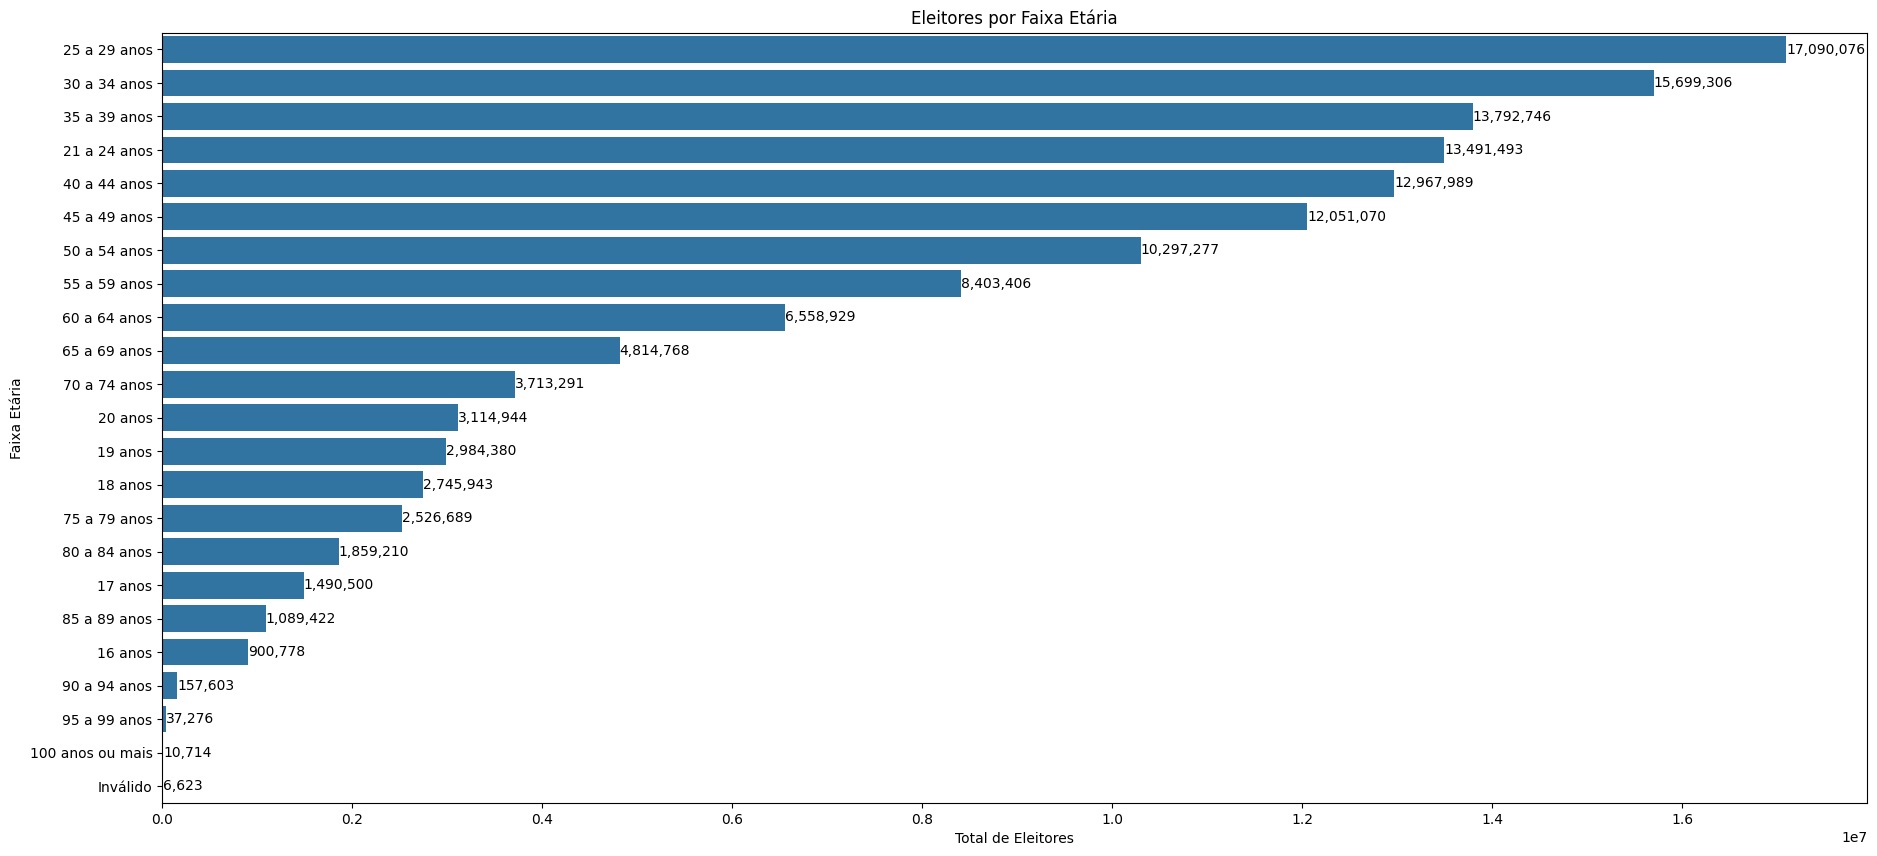

In [33]:
plt.figure(figsize=(22, 10))
sns.barplot(x='Total de Eleitores', y='Faixa Etária', data=faixa_etaria_df, orient='h')
plt.xlabel('Total de Eleitores')
plt.ylabel('Faixa Etária')
plt.title('Eleitores por Faixa Etária')

for i, v in enumerate(faixa_etaria_df['Total de Eleitores']):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Grau de Escolaridade dos Eleitores**

In [34]:
escolaridade_eleitores = df.groupby('DS_GRAU_ESCOLARIDADE')['QT_ELEITORES_PERFIL'].sum()
escolaridade_eleitores = escolaridade_eleitores.sort_values(ascending=False)

total_eleitores_escolaridade = escolaridade_eleitores.sum()
porcentagem_escolaridade = (escolaridade_eleitores / total_eleitores_escolaridade) * 100

tabela_escolaridade = pd.DataFrame({
    'Total de Eleitores': escolaridade_eleitores,
    'Porcentagem': porcentagem_escolaridade.round(2)
})

tabela_escolaridade['Porcentagem'] = tabela_escolaridade['Porcentagem'].astype(str) + '%'


**Tabela**

In [35]:
tabela_escolaridade

,Total de Eleitores,Porcentagem
DS_GRAU_ESCOLARIDADE,,
ENSINO FUNDAMENTAL INCOMPLETO,44935557,33.09%
ENSINO MÉDIO INCOMPLETO,25732349,18.95%
LÊ E ESCREVE,19787586,14.57%
ENSINO MÉDIO COMPLETO,17918370,13.19%
ENSINO FUNDAMENTAL COMPLETO,10319494,7.6%
ANALFABETO,8007315,5.9%
SUPERIOR COMPLETO,5197950,3.83%
SUPERIOR INCOMPLETO,3752948,2.76%
NÃO INFORMADO,152864,0.11%


**Gráfico**

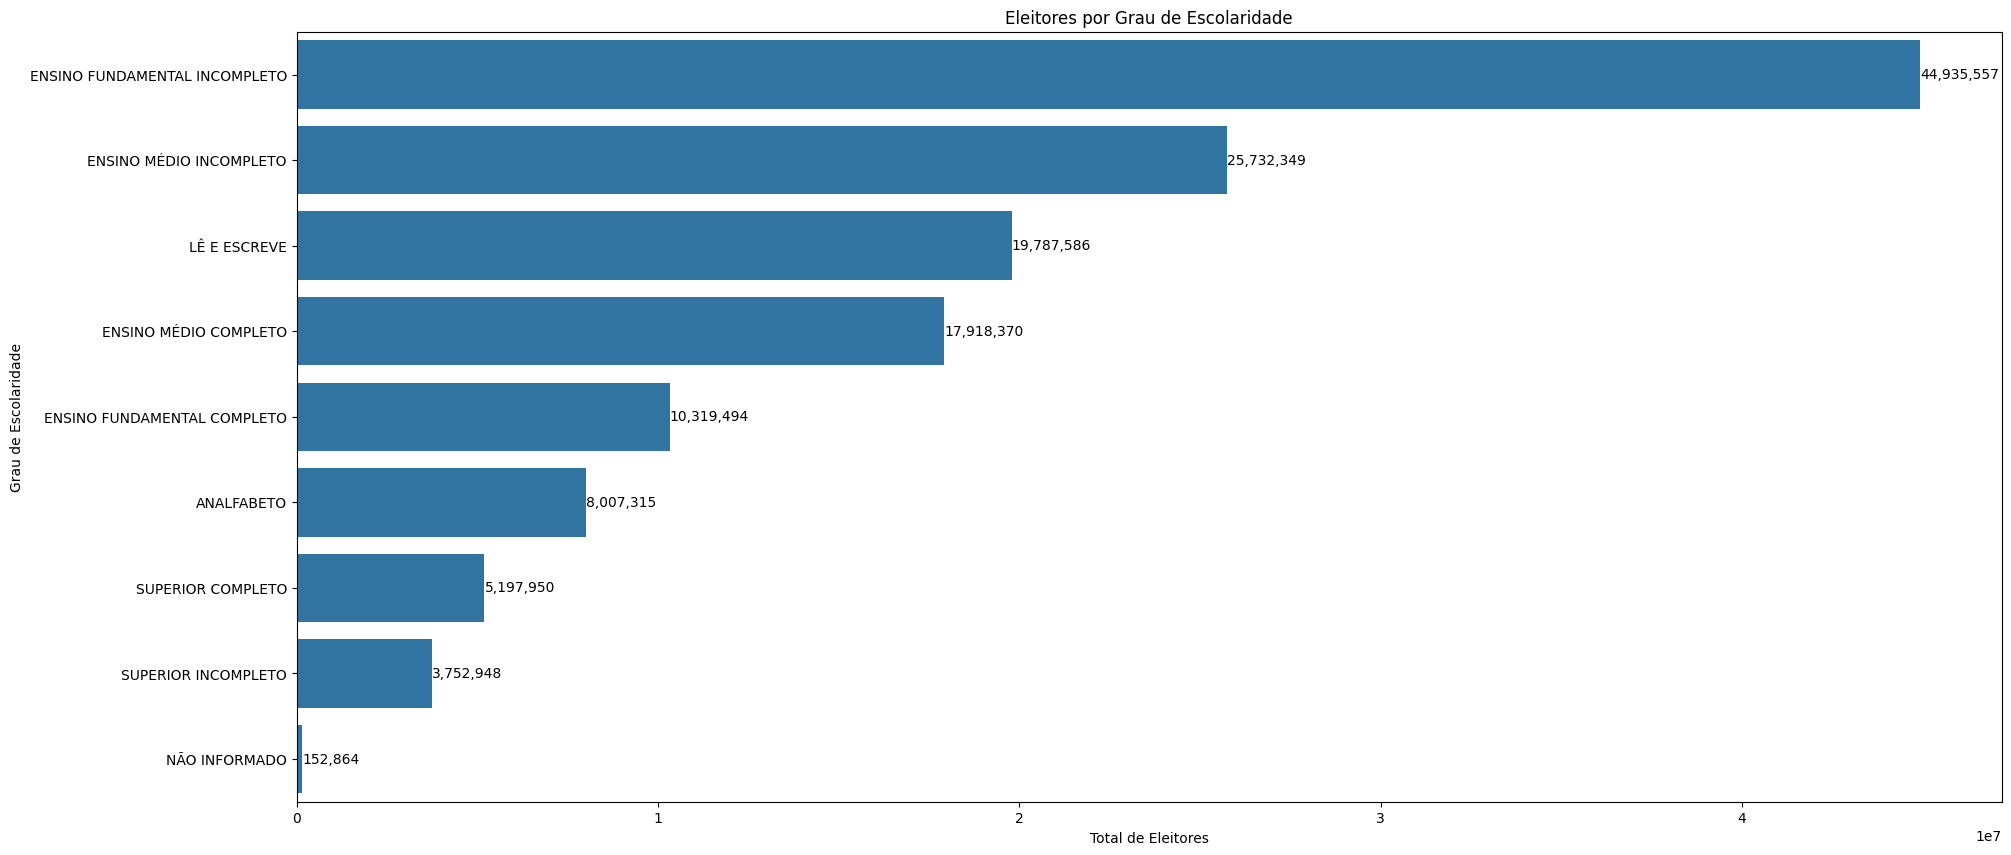

In [36]:
plt.figure(figsize=(22, 10))
sns.barplot(x='Total de Eleitores', y=tabela_escolaridade.index, data=tabela_escolaridade, orient='h')
plt.xlabel('Total de Eleitores')
plt.ylabel('Grau de Escolaridade')
plt.title('Eleitores por Grau de Escolaridade')

for i, v in enumerate(tabela_escolaridade['Total de Eleitores']):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()
